In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import hbar
from math import factorial

In [3]:
def Hermitian(N, X):
    if N == 0:
        return 1
    Hn = np.zeros(N+1)
    if isinstance(X, int):
        Hn[0] = 1
        Hn[1] = 2*X
        if N == 1:
            return Hn[1] 
        for i in range(2,len(Hn)):
            Hn[i] = 2*X*Hn[i-1]-2*(i-1)*Hn[i-2]
        return Hn[-1]
    else:
        HN = []
        for x in X:
            Hn[0] = 1
            Hn[1] = 2*x
            if N == 1:
                return Hn[1] 
            for i in range(2,len(Hn)):
                Hn[i] = 2*x*Hn[i-1]-2*(i-1)*Hn[i-2]
            HN.append(Hn[i])
        
    return HN

In [4]:
def numerow_step(psi_minus_1, psi, k_minus_1,  k, k_plus_1, h):
    h2 = h**2
    a = 2*(1 - (5/12)*(h2)*k)*psi
    b = (1 + (1/12)*(h2)*k_minus_1)*psi_minus_1
    c = (1 + (1/12)*(h2)*k_plus_1)
    return (a-b)/c


def Numerow(x0, xmax, N, epsilon):
    x_out = []
    y_out = []
    x1, stepsize = np.linspace(x0,xmax,N+1,retstep=True)
    K = 2*epsilon - x1**2
    k_minus_1 = K[1]
    k_minus_2 = K[0]
    k = K[2]
    psi_minus_2 = 1
    psi_minus_1 = psi_minus_2[0]-(stepsize**2)*k*psi_minus_2
    y_out.append(psi_minus_2)
    y_out.append(psi_minus_1)
    
    for i, x in enumerate(x1):
        if i <= 1:
            pass
        else:
            y = numerow(k_minus_1, psi_minus_1, k_minus_2, psi_minus_2, k, h)

              # Save for plotting
            y_out.append(y)

          # Shift for next iteration
            psi_minus_2 = psi_minus_1
            psi_minus_1 = y
            k_minus_2 = k_minus_1
            k_minus_1 = k
            k = K[i]
    return x1, y_out
Numerow(0, 4, 1000, 2)

TypeError: 'int' object is not subscriptable

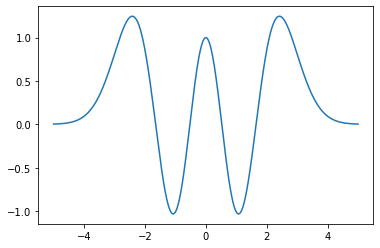

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import hbar
from math import factorial


def numerow_step(psi_minus_1, psi, k_minus_1, k, k_plus_1, h):
    h2 = h ** 2
    a = 2 * (1 - (5 / 12) * (h2) * k) * psi
    b = (1 + (1 / 12) * (h2) * k_minus_1) * psi_minus_1
    c = (1 + (1 / 12) * (h2) * k_plus_1)
    return (a - b) / c


def k(n, x):
    return 2 * (n + (1 / 2)) - x ** 2


def Numerow(a, k, h, xmax, n):
    x0 = 0
    x_out = [x0]
    if n % 2 == 1:
        psi0 = 0
        psi1 = a
    else:  # sym
        psi0 = a
        psi1 = psi0 - h ** 2 * k(n, x0) * psi0 / 2
    psi_out = [psi0, psi1]
    x0 += h
    x_out.append(x0)
    while x0 <= xmax:
        x0 += h
        psin = numerow_step(psi_out[-2], psi_out[-1], k(n, (x_out[-2])), k(n, (x_out[-1])), k(n, (x0)), h)

        # Save for plotting
        psi_out.append(psin)
        x_out.append(x0)
    x_out = np.array(x_out)
    x_out = np.array([*(-1 * x_out[:1:-1]), *x_out])
    psi_out = np.array(psi_out)
    if (n % 2 == 1):  # asym
        pis = np.array([*(-1 * psi_out[:1:-1]), *psi_out])
    else:  # sym
        psi = np.array([*(psi_out[:1:-1]), *psi_out])
    return (x_out, psi)



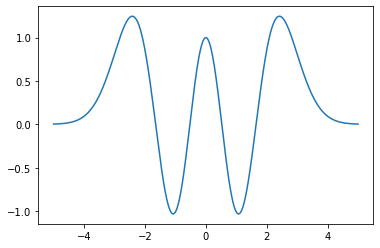

In [6]:


x_out, YG = Numerow(1, k, 0.001, 5, 4)
plt.plot(x_out, YG)

In [15]:
def psi_ana(x0, xmax, N,n):
    x, stepsize = np.linspace(x0,xmax,N+1,retstep=True)
    return (Hermitian(n, x))/np.sqrt(factorial(2**n)*np.sqrt(np.pi))*np.e**(-(x**2)/2), x

In [16]:
psi_Ana, x = psi_ana(-10, 10, 1000, 6)

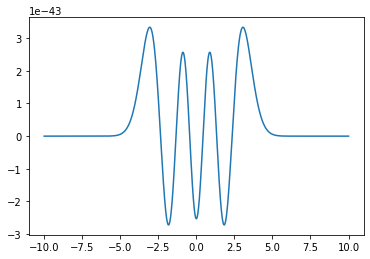

In [17]:
plt.plot(x, psi_Ana)

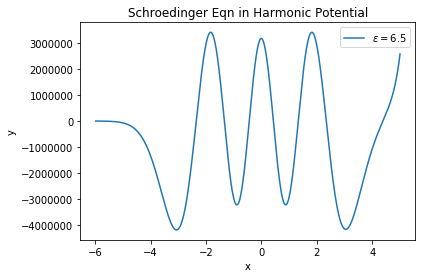

In [8]:
def numerow(k_minus_1, y_minus_1, k_minus_2, y_minus_2, k, h):
    return  ( 2*(1-5*(h**2/12)*k_minus_1) * y_minus_1 - (1+(h**2/12)*k_minus_2) * y_minus_2 ) / (1 + (h**2/12) * k)



def calc(xmin, xmax, steps, stepsize, n):
    epsilon = n+ 0.5
    x1 = np.linspace(xmin, xmax, steps)
    psi_minus_2 = 1 # y_0
    psi_minus_1 = 0 # y_1
    psi = []
    psi.append(psi_minus_2)
    psi.append(psi_minus_1)
    K = 2*epsilon - x1**2

    for i, x in enumerate(x1):
        if i <= 1:
            pass
        else:
            psi_n = numerow(K[i-1], psi[i-1], K[i-2], psi[i-2], K[i], h)

              # Save for plotting
            psi.append(psi_n)
    return x1, psi

N = 119996 # iterations

h = 0.0001
n = 6
xmin = -5.9997 
xmax = 5.9997999999
x, y = calc(-5.9799 , 5.999, 119996, h, 6)

# Plot
plt.figure(1)
plt.plot(x[:109996], y[:109996], label="$\epsilon = "+repr(n+ 0.5)+"$")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Schroedinger Eqn in Harmonic Potential")
plt.legend(loc=1)


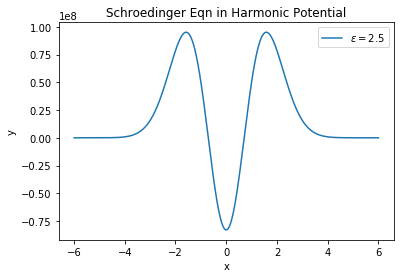

In [22]:
'''
--- Title:      Schroedinger Equation in Harmonic Potential
--- Author:     Matt Evans (mtdevans.com)
--- Copyright:  Do what you want with it.

This program basically just draws the functions for a
given value of epsilon. Epsilon should be an integer n+1/2
for good solutions.
'''

import pylab as lab
import math

N = 60000 # iterations

h = 0.0001
h2 = pow(h,2)

epsilon = 2.5 # n+1/2

y = 0.0
k = 0.0
x = -1*(N-2)*h

k_minus_2 = epsilon + x-2*h # k_0
k_minus_1 = epsilon + x-h # k_1
a = 0.1
y_minus_2 = 0 # y_0
y_minus_1 = a # y_1

x_out = []
y_out = []

n=-1*N+2

while n<N-2:
  n+=1
  x += h;
  k = 2*epsilon - pow(x, 2)
  b = h2/12
  y = ( 2*(1-5*b*k_minus_1) * y_minus_1 - (1+b*k_minus_2) * y_minus_2 ) / (1 + b * k)

  # Save for plotting
  x_out.append(x)
  y_out.append(y)

  # Shift for next iteration
  y_minus_2 = y_minus_1
  y_minus_1 = y
  k_minus_2 = k_minus_1
  k_minus_1 = k


# Plot
lab.figure(1)
lab.plot(x_out, y_out, label="$\epsilon = "+repr(epsilon)+"$")
lab.xlabel("x")
lab.ylabel("y")
lab.title("Schroedinger Eqn in Harmonic Potential")
lab.legend(loc=1)
lab.show()

[0.00273645 0.00274782 0.00275923 ... 0.00275923 0.00274782 0.00273645]


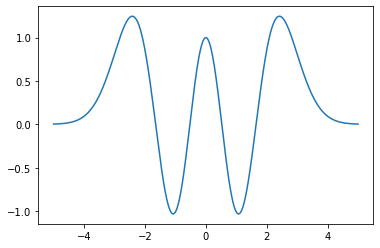

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import hbar
from math import factorial


def numerow_step(psi_minus_1, psi, k_minus_1, k, k_plus_1, h):
    h2 = h ** 2
    a = 2 * (1 - (5 / 12) * (h2) * k) * psi
    b = (1 + (1 / 12) * (h2) * k_minus_1) * psi_minus_1
    c = (1 + (1 / 12) * (h2) * k_plus_1)
    return (a - b) / c


def k(n, x):
    return 2 * (n + (1 / 2)) - x ** 2


def Numerow(a, k, h, xmax, n):
    x0 = 0
    x_out = [x0]
    #    k0 = k(n, x0)
    if n % 2 == 1:
        psi0 = 0
        psi1 = a
    else:  # sym
        psi0 = a
        psi1 = psi0 - h ** 2 * k(n, x0) * psi0 / 2
    psi_out = [psi0, psi1]
    x0 += h
    x_out.append(x0)
    while x0 <= xmax:
        x0 += h
        psin = numerow_step(psi_out[-2], psi_out[-1], k(n, (x_out[-2])), k(n, (x_out[-1])), k(n, (x0)), h)

        # Save for plotting
        psi_out.append(psin)
        x_out.append(x0)
    x_out = np.array(x_out)
    x_out = np.array([*(-1 * x_out[:1:-1]), *x_out])
    psi_out = np.array(psi_out)
    if (n % 2 == 1):  # asym
        pis = np.array([*(-1 * psi_out[:1:-1]), *psi_out])
    else:  # sym
        psi = np.array([*(psi_out[:1:-1]), *psi_out])
    return (x_out, psi)


a = 1

x_out, YG = Numerow_tut(a, k, 0.001, 5, 4)
print(YG)
plt.plot(x_out, YG)